ĐỒ ÁN PHÂN TÍCH DỮ LIỆU

# MỤC LỤC

1. [Khám phá và xử lý dữ liệu](#-cong-viec-1-kham-pha-va-xu-ly-du-lieu)
2. [Trực quan hóa dữ liệu](#công-việc-2-trực-quan-hóa-dữ-liệu)
   - [Matplotlib](#matplotlib)
   - [Seaborn](#seaborn)
   - [Bokeh](#bokeh)
3. [Kiểm định thống kê với giả thuyết](#công-việc-3-kiểm-định-thống-kê-với-giả-thuyết)

## CÔNG VIỆC 1: KHÁM PHÁ VÀ XỬ LÝ DỮ LIỆU

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, CheckboxGroup, CustomJS, Slider
from bokeh.io import output_notebook
from bokeh.layouts import row, column
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

In [2]:
df = pd.read_csv("student-mat.csv",sep=';')

In [26]:
df.info() #Thông tin tổng quan
df.describe()# Thống kê mô tả

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
#kiểm tra giá trị thiếu trên mỗi cột
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

#Xử lý giá trị bị thiếu bằng trung bình hoặc loại bỏ
df["age"].fillna(df["age"].mean())
df_cleaned = df.dropna()

Series([], dtype: int64)


## CÔNG VIỆC 2: TRỰC QUAN HÓA DỮ LIỆU

### Matplotlib

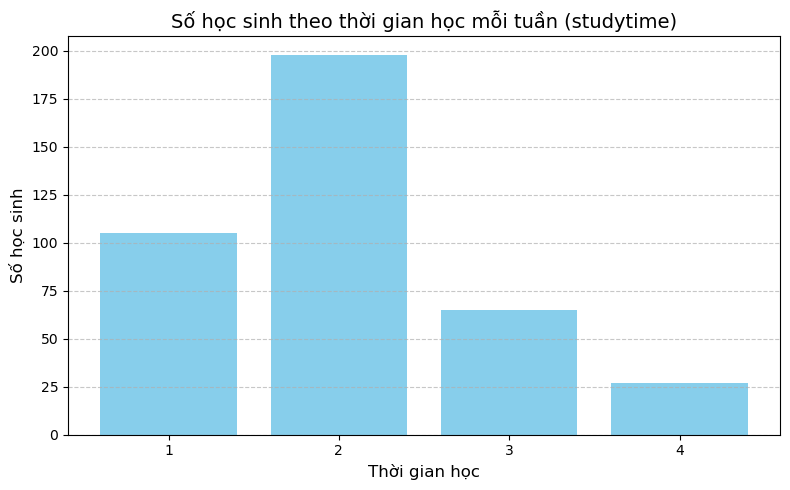

In [65]:
#Biểu đồ cột: Số học sinh theo studytime
# Đếm số học sinh theo từng mức studytime
studytime_counts = df["studytime"].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(8,5))
plt.bar(studytime_counts.index.astype(str), studytime_counts.values, color='skyblue')

# Thêm tiêu đề và nhãn trục
plt.title("Số học sinh theo thời gian học mỗi tuần (studytime)", fontsize=14)
plt.xlabel("Thời gian học", fontsize=12)
plt.ylabel("Số học sinh", fontsize=12)

# Hiển thị biểu đồ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

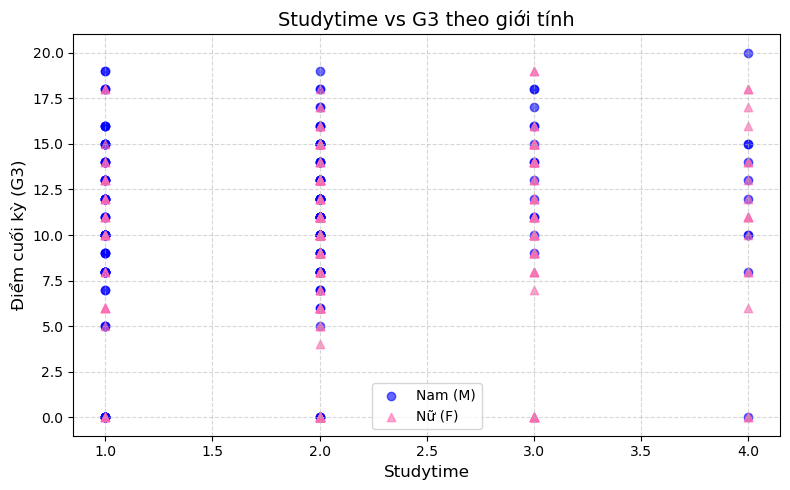

In [12]:
#Vẽ biểu đồ phân tán: studytime và G3 vơi màu sắc khác nhau cho nam(sex='M') và nữ(sex='F')
# Tách dữ liệu theo giới tính
df_male = df[df["sex"] == "M"]
df_female = df[df["sex"] == "F"]

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))

# Nam - màu xanh
plt.scatter(df_male["studytime"], df_male["G3"], color='blue', alpha=0.6, label='Nam (M)', marker='o')

# Nữ - màu hồng
plt.scatter(df_female["studytime"], df_female["G3"], color='hotpink', alpha=0.6, label='Nữ (F)', marker='^')

# Thêm nhãn và tiêu đề
plt.title("Studytime vs G3 theo giới tính", fontsize=14)
plt.xlabel("Studytime", fontsize=12)
plt.ylabel("Điểm cuối kỳ (G3)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Seaborn

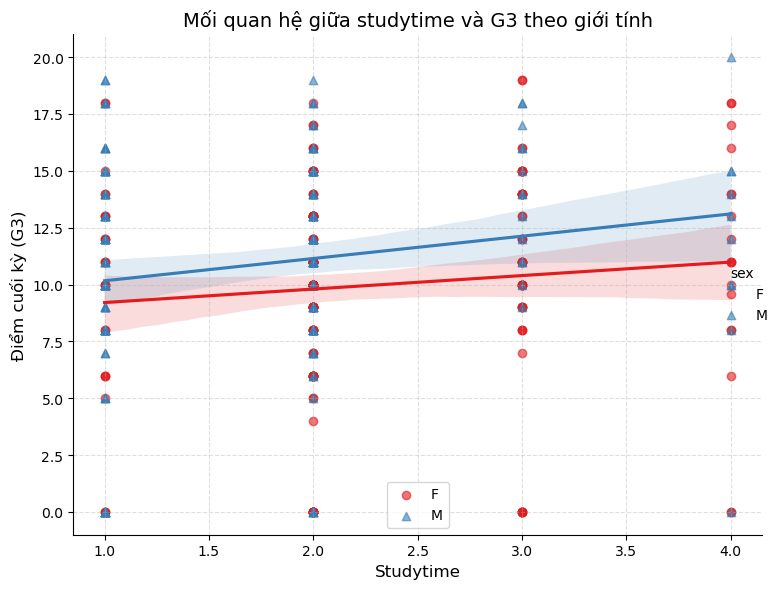

In [73]:
#implot:studytime và G3,với hue='sex'
# Vẽ lmplot
sns.lmplot(
    data=df,
    x="studytime",
    y="G3",
    hue="sex",        # Phân biệt nam/nữ
    palette="Set1",   
    markers=["o", "^"],
    height=6,
    aspect=1.2,
    scatter_kws={'alpha':0.6}  # Độ trong của điểm
)

# Thêm tiêu đề
plt.title("Mối quan hệ giữa studytime và G3 theo giới tính", fontsize=14)
plt.xlabel("Studytime", fontsize=12)
plt.ylabel("Điểm cuối kỳ (G3)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

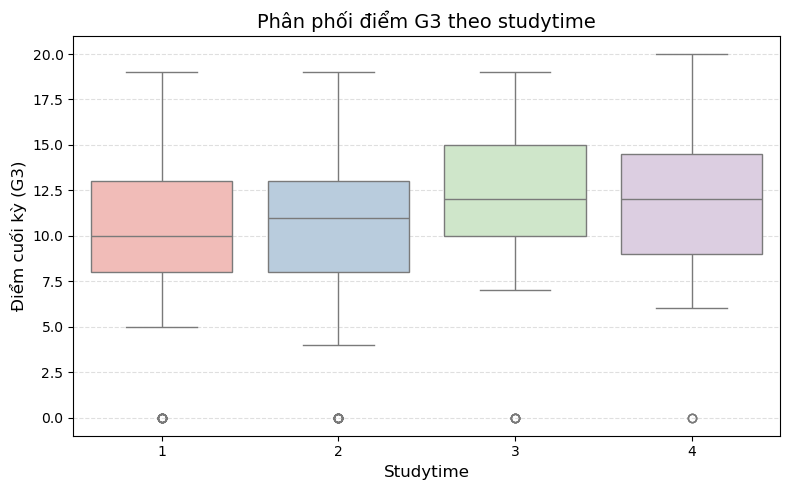

In [70]:
#box plot: phân phối G3 theo studytime
# Vẽ boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="studytime",
    y="G3",
    hue="studytime",          
    palette="Pastel1",
    legend=False
)

# Thêm tiêu đề và nhãn
plt.title("Phân phối điểm G3 theo studytime", fontsize=14)
plt.xlabel("Studytime", fontsize=12)
plt.ylabel("Điểm cuối kỳ (G3)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

### Bokeh

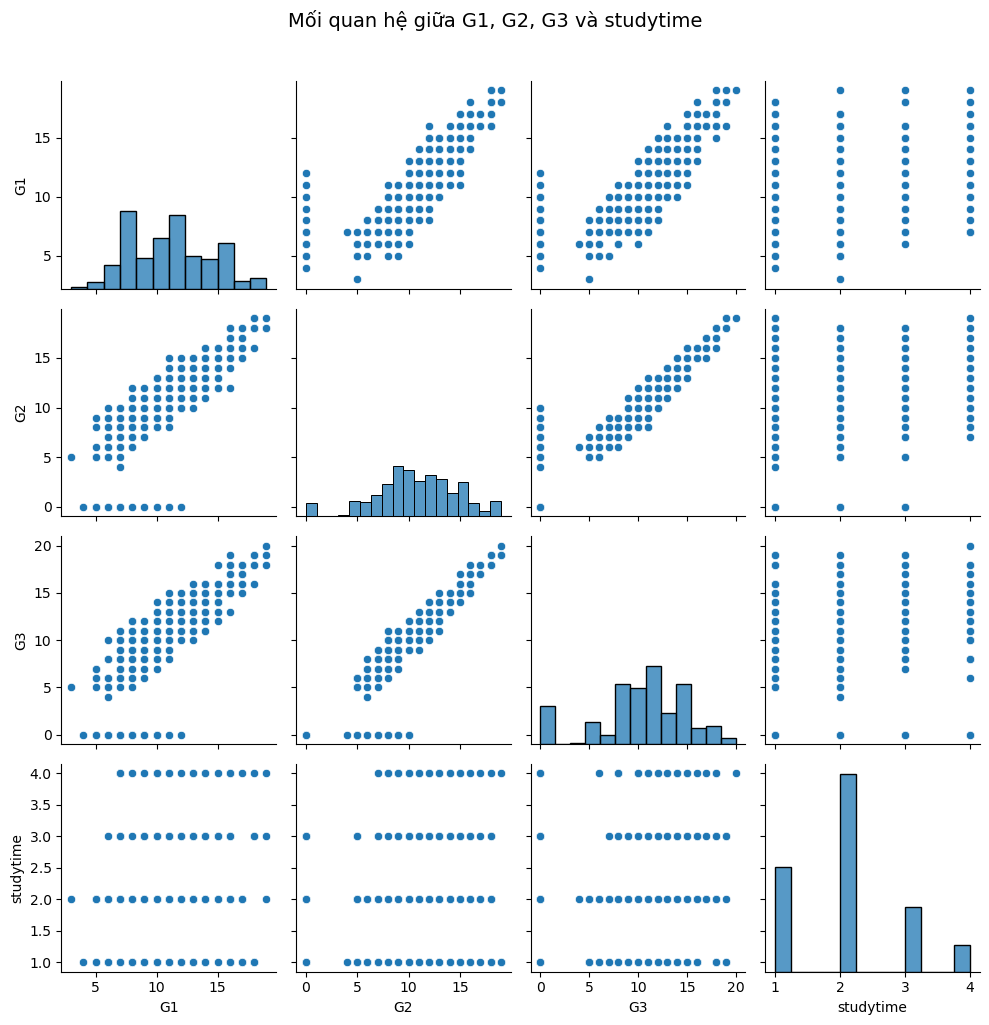

In [44]:
#pairplot:mối quan hệ giữa g1,g2,g3,studytime
# Lấy các cột cần phân tích
cols = ["G1", "G2", "G3", "studytime"]

# Vẽ pairplot
sns.pairplot(df[cols], diag_kind="hist")

plt.suptitle("Mối quan hệ giữa G1, G2, G3 và studytime", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


In [55]:
# Hiển thị trong notebook
output_notebook()

source = ColumnDataSource(data={
    'studytime': df['studytime'],
    'G3': df['G3'],
    'age': df['age'],
    'sex': df['sex'],
    'absences': df['absences']
})

# Tạo biểu đồ
p = figure(
    title="Biểu đồ phân tán: Studytime vs G3",
    x_axis_label='Studytime',
    y_axis_label='Điểm cuối kỳ (G3)',
    tools="pan,wheel_zoom,box_zoom,reset"
)
p.title.align = "center"

# Thêm các điểm dữ liệu
p.scatter(
    x='studytime',
    y='G3',
    size=8,
    source=source,
    color="dodgerblue",
    fill_alpha=0.6,
    marker="circle",
    legend_label="Học sinh"
)

# Thêm HoverTool để hiển thị thông tin
hover = HoverTool()
hover.tooltips = [
    ("Age", "@age"),
    ("Sex", "@sex"),
    ("Absences", "@absences")
]
p.add_tools(hover)

# Hiển thị biểu đồ
show(p)

Loading BokehJS ...

In [ ]:
# Biểu đồ cột: Số lượng học sinh theo studytime
studytime_counts = df["studytime"].value_counts().sort_index()
bar_source = ColumnDataSource(data={
    "studytime": [str(i) for i in studytime_counts.index],  # chuyển sang string cho trục x
    "count": studytime_counts.values
})

bar_plot = figure(
    title="Số học sinh theo Studytime",
    x_range=bar_source.data["studytime"],
    x_axis_label="Studytime",
    y_axis_label="Số học sinh",
    height=400,
    width=400,
    tools="pan,wheel_zoom,reset"
)
bar_plot.vbar(x="studytime", top="count", width=0.6, source=bar_source, color="skyblue")
bar_plot.title.align = "center"
#Biểu đồ phân tán: Studytime vs G3 (có HoverTool)
scatter_source = ColumnDataSource(data={
    "studytime": df["studytime"],
    "G3": df["G3"],
    "age": df["age"],
    "sex": df["sex"],
    "absences": df["absences"]
})

scatter_plot = figure(
    title="Studytime vs G3",
    x_axis_label="Studytime",
    y_axis_label="Điểm G3",
    height=400,
    width=500,
    tools="pan,wheel_zoom,box_zoom,reset"
)
scatter_plot.title.align = "center"

scatter_plot.scatter(
    x="studytime",
    y="G3",
    size=8,
    source=scatter_source,
    color="dodgerblue",
    fill_alpha=0.6,
    marker="circle"
)

hover = HoverTool(tooltips=[
    ("Age", "@age"),
    ("Sex", "@sex"),
    ("Absences", "@absences")
])
scatter_plot.add_tools(hover)

#Hiển thị 2 biểu đồ cạnh nhau
show(row(bar_plot, scatter_plot))

In [60]:
df_male = df[df['sex'] == 'M']
df_female = df[df['sex'] == 'F']

source_m = ColumnDataSource(data={
    'x': df_male['studytime'],
    'y': df_male['G3'],
    'age': df_male['age'],
    'absences': df_male['absences'],
    'sex': df_male['sex']
})

source_f = ColumnDataSource(data={
    'x': df_female['studytime'],
    'y': df_female['G3'],
    'age': df_female['age'],
    'absences': df_female['absences'],
    'sex': df_female['sex']
})

# Biểu đồ
p = figure(title="Studytime vs G3", x_axis_label="Studytime", y_axis_label="G3", tools="pan,wheel_zoom,reset")
p.title.align = "center"

male_renderer = p.scatter('x', 'y', source=source_m, size=8, color='blue', alpha=0.6, legend_label='Nam')
female_renderer = p.scatter('x', 'y', source=source_f, size=8, color='red', alpha=0.6, legend_label='Nữ')

# Checkbox để bật/tắt từng giới tính
checkbox = CheckboxGroup(labels=["Nam", "Nữ"], active=[0, 1])

# JavaScript callback
callback = CustomJS(args=dict(male=male_renderer, female=female_renderer, checkbox=checkbox), code="""
    male.visible = checkbox.active.includes(0);
    female.visible = checkbox.active.includes(1);
""")

checkbox.js_on_change("active", callback)

# Hiển thị
show(column(checkbox, p))

In [64]:
source_original = ColumnDataSource(data=dict(
    studytime=df['studytime'],
    G3=df['G3'],
    age=df['age'],
    sex=df['sex'],
    absences=df['absences']
))

# Tạo source hiển thị
source_filtered = ColumnDataSource(data=source_original.data.copy())

# Biểu đồ
p = figure(title="Studytime vs G3", 
           x_axis_label='Studytime', y_axis_label='Điểm G3',
           tools="pan,wheel_zoom,box_zoom,reset")
p.title.align = "center"

# Dùng scatter 
p.scatter('studytime', 'G3', source=source_filtered, size=8,
          color='dodgerblue', alpha=0.6)

# HoverTool
hover = HoverTool(tooltips=[
    ("Age", "@age"),
    ("Sex", "@sex"),
    ("Absences", "@absences")
])
p.add_tools(hover)

# Slider lọc studytime
slider = Slider(start=1, end=4, value=1, step=1, title="Lọc theo Studytime")

# Callback JavaScript để lọc
callback = CustomJS(args=dict(source=source_original, filtered=source_filtered, slider=slider), code="""
    const data = source.data;
    const f_data = {studytime: [], G3: [], age: [], sex: [], absences: []};
    const selected = slider.value;

    for (let i = 0; i < data['studytime'].length; i++) {
        if (data['studytime'][i] == selected) {
            f_data['studytime'].push(data['studytime'][i]);
            f_data['G3'].push(data['G3'][i]);
            f_data['age'].push(data['age'][i]);
            f_data['sex'].push(data['sex'][i]);
            f_data['absences'].push(data['absences'][i]);
        }
    }
    filtered.data = f_data;
    filtered.change.emit();
""")
slider.js_on_change('value', callback)

# Hiển thị layout
show(column(slider, p))


## CÔNG VIỆC 3: KIỂM ĐỊNH THỐNG KÊ VỚI GIẢ THUYẾT

In [ ]:
#H0 (Giả thuyết không): Không có sự khác biệt đáng kể về điểm G3 giữa hai nhóm học sinh nghỉ nhiều và nghỉ ít.
#H1 (Giả thuyết thay thế): Học sinh nghỉ nhiều có điểm G3 thấp hơn đáng kể so với học sinh nghỉ ít.

# Tính trung bình số ngày nghỉ
mean_absences = df['absences'].mean()

# Chia thành 2 nhóm: nghỉ ít hơn hoặc bằng trung bình, và nghỉ nhiều hơn
low_abs = df[df['absences'] <= mean_absences]['G3']
high_abs = df[df['absences'] > mean_absences]['G3']

#Thực hiện kiểm định t-test
t_stat, p_value = stats.ttest_ind(low_abs, high_abs, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

#Kết luận theo alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Kết luận: Bác bỏ H0. Có sự khác biệt đáng kể. Học sinh nghỉ nhiều có G3 thấp hơn.")
else:
    print("Kết luận: Không bác bỏ H0. Không có bằng chứng rõ ràng rằng học sinh nghỉ nhiều có G3 thấp hơn.")

T-statistic: -1.5676
P-value: 0.1178
Kết luận: Không bác bỏ H0. Không có bằng chứng rõ ràng rằng học sinh nghỉ nhiều có G3 thấp hơn.


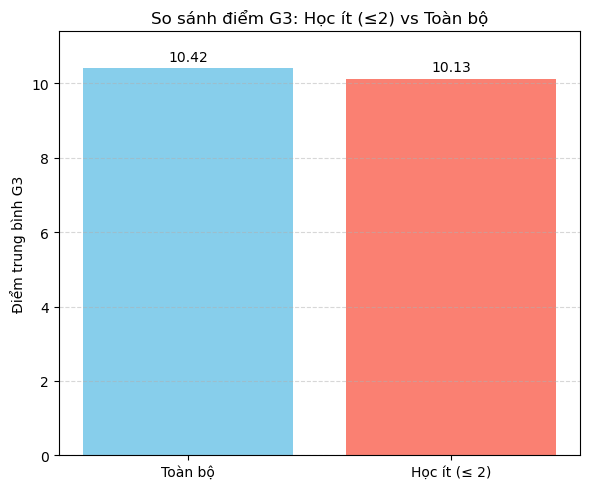

In [11]:
# Tính trung bình
mean_all = df['G3'].mean()
mean_low_study = df[df['studytime'] <= 2]['G3'].mean()

# Dữ liệu cho biểu đồ
labels = ['Toàn bộ', 'Học ít (≤ 2)']
means = [mean_all, mean_low_study]

# Vẽ biểu đồ
plt.figure(figsize=(6, 5))
plt.bar(labels, means, color=['skyblue', 'salmon'])
plt.ylabel("Điểm trung bình G3")
plt.title("So sánh điểm G3: Học ít (≤2) vs Toàn bộ")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, max(means) + 1)

# Hiển thị giá trị trên cột
for i, v in enumerate(means):
    plt.text(i, v + 0.2, f"{v:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [8]:
# Nhóm học sinh học ít (studytime ≤ 2)
low_study = df[df['studytime'] <= 2]['G3']

# Trung bình và độ lệch chuẩn toàn bộ mẫu
mean_all = df['G3'].mean()

# Thực hiện z-test: kiểm tra xem trung bình của low_study có khác biệt so với toàn bộ
z_stat, p_value = ztest(low_study, value=mean_all)

# In kết quả
print("Z-statistic:", z_stat)
print("P-value:", p_value)

# Đánh giá kết luận
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ H0: Trung bình G3 của học sinh học ít KHÁC biệt đáng kể so với trung bình toàn bộ.")
else:
    print("Không bác bỏ H0: Không có bằng chứng rõ ràng về sự khác biệt trung bình G3.")

Z-statistic: -1.1132147357769344
P-value: 0.2656162153961643
Không bác bỏ H0: Không có bằng chứng rõ ràng về sự khác biệt trung bình G3.


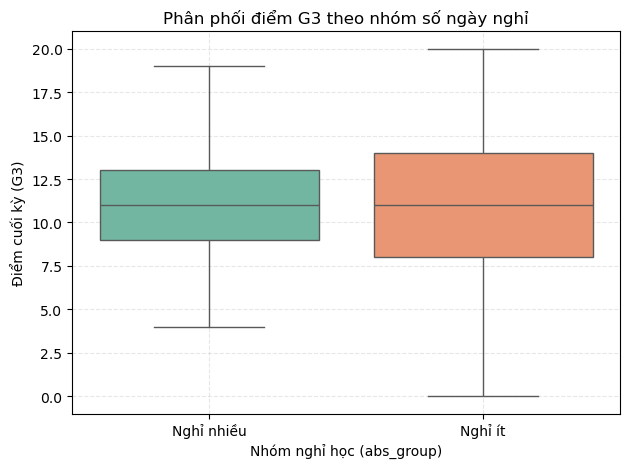

In [10]:
sns.boxplot(
    data=df,
    x='abs_group',
    y='G3',
    hue='abs_group',        # Chỉ định hue để dùng palette đúng cách
    palette='Set2',
    dodge=False,            # Để không bị tách 2 box giống nhau
    legend=False            # Tắt legend nếu không cần lặp lại nhãn
)

plt.title("Phân phối điểm G3 theo nhóm số ngày nghỉ")
plt.xlabel("Nhóm nghỉ học (abs_group)")
plt.ylabel("Điểm cuối kỳ (G3)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()